In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import onnx

import torch
import torchvision
from onnx import shape_inference

from src.model import DehazeModel

In [7]:
def dehaze(image_path):

    hazy_image = Image.open(image_path)
    hazy_image = (np.asarray(hazy_image) / 255.0)

    hazy_image = torch.from_numpy(hazy_image).float()
    hazy_image = hazy_image.permute(2, 0, 1)
    hazy_image = hazy_image.unsqueeze(0)

    model = DehazeModel()
    model.load_state_dict(torch.load('/Users/daniilskrabo/Desktop/Practice STC/Image-Dehazing/data/weights/model_weights_new.pt', map_location = 'cpu'))

    clear_image = model(hazy_image)

    torchvision.utils.save_image(torch.cat((hazy_image, clear_image), 0), '/Users/daniilskrabo/Desktop/Practice STC/Image-Dehazing/data/examples/' + image_path.split('/')[-1])

    return clear_image.detach().numpy().squeeze(0).transpose(1, 2, 0)


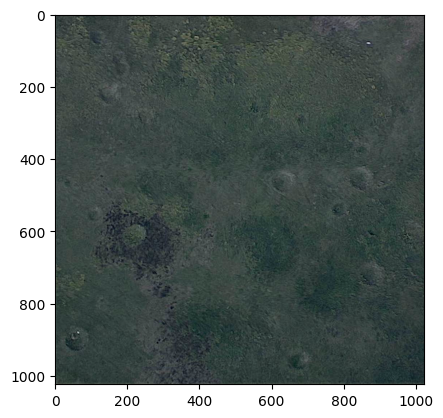

In [8]:
clear_image = dehaze('/Users/daniilskrabo/Desktop/Practice STC/Image-Dehazing/photo_2024-06-26 18.08.00.jpeg')
plt.imshow(clear_image)
plt.imsave('example.png', clear_image)